# Linear Regression Analysis

### Content:
- Exploratory Data Analysis
- Multiple Linear Regression
- Model Performance Statistics
- Polynomial Regression
- Multiple Linear Regression by Car Model

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#all visuals appear
%matplotlib inline

In [3]:
#import car listings data
path = '/Users/kimballwightman/Desktop/Projects/Used Car Listings Analysis'

In [4]:
df_cars = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cars_prices_clean.csv'), index_col = [0])

In [5]:
df_cars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


### EDA

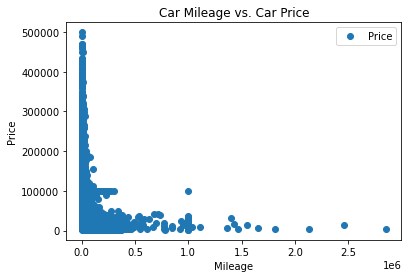

In [6]:
#explore data visually with a scatterplot
df_cars.plot(x = 'Mileage', y='Price',style='o')
plt.title('Car Mileage vs. Car Price')  
plt.xlabel('Mileage')  
plt.ylabel('Price') 
plt.show()

Overall, car price decreases as mileage gets higher.

### Multiple Linear Regression

In [7]:
#reshape variables into numpy arrays
X = df_cars[['Mileage','Year']].values.reshape(-1,2)
y = df_cars['Price'].values.reshape(-1,1)

In [8]:
X

array([[35725,  2014],
       [19606,  2013],
       [48851,  2013],
       ...,
       [28941,  2016],
       [ 3005,  2017],
       [ 2502,  2017]])

In [9]:
y

array([[ 8995],
       [10888],
       [ 8995],
       ...,
       [55999],
       [60240],
       [76995]])

In [10]:
#split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
#run a linear regression
regression = LinearRegression()

In [12]:
regression.fit(X_train, y_train)

LinearRegression()

In [13]:
X_test_sorted = np.sort(X_test, axis=0)

In [14]:
X_test_sorted

array([[      5,    1997],
       [      5,    1997],
       [      5,    1997],
       ...,
       [1428913,    2018],
       [1469001,    2018],
       [1650780,    2018]])

In [15]:
y_predicted = regression.predict(X_test_sorted)

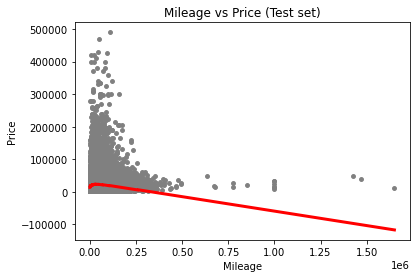

In [75]:
#plot a regression line on the test set
plot_test = plt
plot_test.scatter(X_test_sorted[:,0], y_test, color='gray', s = 15)
plot_test.plot(X_test_sorted[:,0], y_predicted, color='red', linewidth =3)
plot_test.title('Mileage vs Price (Test set)')
plot_test.xlabel('Mileage')
plot_test.ylabel('Price')
plot_test.show()

This is a poorly-fit regression line. Compared to the highest mileage cars, any observations with about half that mileage or more are predicted to have a price lower than the cheapest car listed for its make. Basically it's predicting negative prices for more extreme values in mileage, which exist. You can't have a negative price. Need a different model.

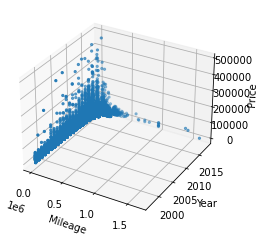

In [41]:
#plot a 3D visualization of this model
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_sorted[:,0], X_test_sorted[:,1], y_test, marker='.')
ax.set_xlabel("Mileage")
ax.set_ylabel("Year")
ax.set_zlabel("Price")

plt.show()


### Model Performance Statistics

In [76]:
#check the model performance statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [77]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-8.86671357e-02  7.59513632e+02]]
Mean squared error:  188533765.26468852
R2 score:  -0.03589343036785575


In [78]:
#compare the predicted and actual values in a df
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,32991.0,13717.745061
1,47900.0,13717.745061
2,23899.0,13717.745061
3,10995.0,13717.745061
4,11300.0,13717.745061
5,11000.0,13717.745061
6,12506.0,13717.745061
7,30969.0,13717.745061
8,14995.0,13717.745061
9,7880.0,13717.745061


### Polynomial Regression

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
#create a new feature for making a quadratic regression model
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [81]:
X_poly = poly_features.fit_transform(X)

# .reshape(-1,1)

In [82]:
#observe the new feature
X[0]

array([35725,  2014])

In [83]:
X_poly[0]

array([3.57250000e+04, 2.01400000e+03, 1.27627562e+09, 7.19501500e+07,
       4.05619600e+06])

In [84]:
#train/test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_poly, y, test_size = 0.3, random_state = 0)

In [85]:
regression2 = LinearRegression()

In [86]:
regression2.fit(X_train_2, y_train_2)

LinearRegression()

In [87]:
#observe the intercept and coefficients for the regression model of form y=Bo+B1x+B2x^2
regression2.intercept_, regression2.coef_

(array([18092010.39353473]),
 array([[ 1.15067249e+01, -1.90588750e+04,  4.73644073e-08,
         -5.77495559e-03,  5.00966486e+00]]))

In [88]:
#sort X_test_2
X_test_2_sorted = np.sort(X_test_2, axis=0)

In [89]:
X_test_2_sorted

array([[5.00000000e+00, 1.99700000e+03, 2.50000000e+01, 1.00700000e+04,
        3.98800900e+06],
       [5.00000000e+00, 1.99700000e+03, 2.50000000e+01, 1.00700000e+04,
        3.98800900e+06],
       [5.00000000e+00, 1.99700000e+03, 2.50000000e+01, 1.00750000e+04,
        3.98800900e+06],
       ...,
       [1.42891300e+06, 2.01800000e+03, 2.04179236e+12, 2.86497056e+09,
        4.07232400e+06],
       [1.46900100e+06, 2.01800000e+03, 2.15796394e+12, 2.94975401e+09,
        4.07232400e+06],
       [1.65078000e+06, 2.01800000e+03, 2.72507461e+12, 3.31806780e+09,
        4.07232400e+06]])

In [90]:
y_predicted_2 = regression2.predict(X_test_2_sorted)

In [91]:
y_predicted_2

array([[10024.98911218],
       [10024.98911218],
       [10024.9602374 ],
       ...,
       [25918.41925602],
       [ 3081.78652219],
       [-5372.20044429]])

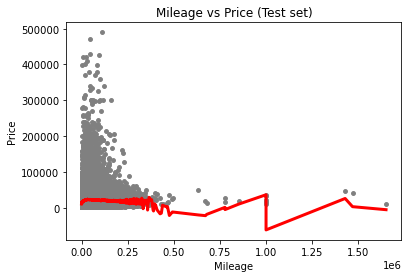

In [92]:
plot_test_2 = plt
plot_test_2.scatter(X_test_2_sorted[:,0], y_test_2, color='gray', s = 15)
plot_test_2.plot(X_test_2_sorted[:,0], y_predicted_2, color='red', linewidth =3)
plot_test_2.title('Mileage vs Price (Test set)')
plot_test_2.xlabel('Mileage')
plot_test_2.ylabel('Price')
plot_test_2.show()

Okay, so if we ignore the area where the outliers are for mileage, maybe this is a bit better at predicting. Still not a great model though.

### Model Performance

In [93]:
rmse_poly = mean_squared_error(y_test_2, y_predicted_2)
r2_poly = r2_score(y_test_2, y_predicted_2)

In [94]:
print('Coefficients:' ,regression2.coef_)
print('Mean squared error: ', rmse_poly)
print('R2 score: ', r2_poly)

Coefficients: [[ 1.15067249e+01 -1.90588750e+04  4.73644073e-08 -5.77495559e-03
   5.00966486e+00]]
Mean squared error:  185417131.68920988
R2 score:  -0.018769175510007896


Compared to the performance on a regular linear regression we did earlier:

- Mean squared error:  188,533,765.26
- R2 score:  -0.036

Typically the R2 score only ranges between 0 and 1, but in models it's a negative number. The reason for this is because we train the data on the training data set, and then introduce it to the test data set that it hasn't seen before. 

Neither of these models are good.

### Multiple Linear Regression by Car Model

In [6]:
#first we need to create a make_model variable so that models with the same name but different makes don't get grouped together.
df_cars['make_model'] = df_cars['Make'] + ' ' + df_cars['Model']

In [7]:
pd.options.display.max_rows=None

In [8]:
df_cars['make_model'].value_counts()

Chevrolet Silverado                         24929
Honda Accord                                14502
Ford F-1504WD                               14177
Nissan Altima2.5                            11288
Honda Civic                                 11273
GMC Sierra                                  11208
BMW 3                                       11131
Jeep Grand                                  10895
Jeep Wrangler                                7975
Ford Super                                   7953
Volkswagen Jetta                             7340
Hyundai Santa                                6708
Ford FusionSE                                6386
Chevrolet EquinoxFWD                         6223
Dodge Grand                                  5709
Toyota Tundra                                5449
BMW 5                                        5348
Lexus RX                                     5327
Ford F-1502WD                                5144
Toyota CamrySE                               4825


First off, we can see that some models have very few observations, even only showing up one time. Getting a good predicted value with these models won't do so well. Let's create a new dataframe that excludes these models with a low count.

In [7]:
df_model_count = df_cars['make_model'].value_counts().to_frame().reset_index()

In [10]:
df_model_count

,index,make_model
0,Chevrolet Silverado,24929
1,Honda Accord,14502
2,Ford F-1504WD,14177
3,Nissan Altima2.5,11288
4,Honda Civic,11273
5,GMC Sierra,11208
6,BMW 3,11131
7,Jeep Grand,10895
8,Jeep Wrangler,7975
9,Ford Super,7953


In [8]:
df_model_count.rename(columns = {'make_model':'count','index':'make_model'}, inplace = True)

In [12]:
df_model_count.head()

,make_model,count
0,Chevrolet Silverado,24929
1,Honda Accord,14502
2,Ford F-1504WD,14177
3,Nissan Altima2.5,11288
4,Honda Civic,11273


In [9]:
df_merge = df_cars.merge(df_model_count, on = ['make_model'])

In [14]:
df_merge.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model,count
0,8995.0,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,Acura ILX6-Speed,19
1,8995.0,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,Acura ILX6-Speed,19
2,10495.0,2013,57596,Waterbury,CT,19VDE2E50DE000234,Acura,ILX6-Speed,Acura ILX6-Speed,19
3,16994.0,2015,22756,Hollywood,FL,19VDE2E50FE000124,Acura,ILX6-Speed,Acura ILX6-Speed,19
4,17995.0,2015,31872,Indianapolis,IN,19VDE2E55FE000037,Acura,ILX6-Speed,Acura ILX6-Speed,19


In [10]:
df_merge[df_merge['count']>=10].nunique()

Price          46871
Year              22
Mileage       158554
City            2553
State             51
Vin           849429
Make              55
Model           1902
make_model      1913
count            723
dtype: int64

In [16]:
df_cars['make_model'].nunique()

2755

By only including the models that show up in our data at least 10 times, we dropped 842 models. We still have almost 2000 models to work with.

In [11]:
#create a subset of our data only including models that have at least 10 instances
df_models = df_merge[df_merge['count']>=10]

In [12]:
#create dummy variables for each model
df_models.shape

(849446, 10)

In [19]:
df_models['make_model'].nunique()

1913

Creating dummy variables for each model is going to create over 1900 extra variables to our regression model. Degrees of freedom are calculated by N-k-1, where N is the number of observations (849446), and k is the number of parameters(over 1900 including the dummy variables). After plugging these in and calculating, the degrees of freedom still remain quite high. This will be important in assessing the model performance.

After creating the dummies, we'll drop one of them to avoid the dummy variable trap. One of the assumptions for OLS multiple regression to hold is that there is no perfect collinearity; this would exist if we don't drop one of the dummies and make it our base group.

In [13]:
#create dummy variables for each model; drop the first one
df_dummies = pd.get_dummies(df_models, columns = ['make_model'])

In [21]:
df_dummies.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,count,make_model_AM General,...,make_model_Volvo XC90T5,make_model_Volvo XC90T6,make_model_smart fortwo,make_model_smart fortwo2dr,make_model_smart fortwoCoupe,make_model_smart fortwoPassion,make_model_smart fortwoPrime,make_model_smart fortwoPure,make_model_smart fortwopassion,make_model_smart fortwopure
0,8995.0,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,19,0,...,0,0,0,0,0,0,0,0,0,0
1,8995.0,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,19,0,...,0,0,0,0,0,0,0,0,0,0
2,10495.0,2013,57596,Waterbury,CT,19VDE2E50DE000234,Acura,ILX6-Speed,19,0,...,0,0,0,0,0,0,0,0,0,0
3,16994.0,2015,22756,Hollywood,FL,19VDE2E50FE000124,Acura,ILX6-Speed,19,0,...,0,0,0,0,0,0,0,0,0,0
4,17995.0,2015,31872,Indianapolis,IN,19VDE2E55FE000037,Acura,ILX6-Speed,19,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#drop AM General model to avoid dummy variable trap
df_reg = df_dummies.drop(columns = ['City','State','Vin','Make','Model','count','make_model_AM General'])

In [23]:
df_reg.head()

,Price,Year,Mileage,make_model_Acura CLType-S,make_model_Acura ILX5-Speed,make_model_Acura ILX6-Speed,make_model_Acura ILXAutomatic,make_model_Acura ILXHybrid,make_model_Acura ILXPremium,make_model_Acura ILXTechnology,...,make_model_Volvo XC90T5,make_model_Volvo XC90T6,make_model_smart fortwo,make_model_smart fortwo2dr,make_model_smart fortwoCoupe,make_model_smart fortwoPassion,make_model_smart fortwoPrime,make_model_smart fortwoPure,make_model_smart fortwopassion,make_model_smart fortwopure
0,8995.0,2014,35725,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8995.0,2013,48851,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10495.0,2013,57596,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16994.0,2015,22756,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17995.0,2015,31872,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_reg.shape

(849446, 1915)

In [15]:
#run the regular regression again; reshape using 1914, since that's how many parameters we have in our model.
X = df_reg.loc[:,df_reg.columns != 'Price'].values.reshape(-1,1914)
y = df_reg['Price'].values.reshape(-1,1)

In [26]:
X

array([[ 2014, 35725,     0, ...,     0,     0,     0],
       [ 2013, 48851,     0, ...,     0,     0,     0],
       [ 2013, 57596,     0, ...,     0,     0,     0],
       ...,
       [ 2017,  7530,     0, ...,     0,     0,     0],
       [ 2017,  2474,     0, ...,     0,     0,     0],
       [ 2017,     9,     0, ...,     0,     0,     0]])

In [27]:
y

array([[ 8995.],
       [ 8995.],
       [10495.],
       ...,
       [53855.],
       [54995.],
       [63215.]])

In [16]:
regression = LinearRegression()

In [17]:
regression.fit(X, y)

LinearRegression()

In [18]:
y_predicted = regression.predict(X)

In [33]:
y_predicted

array([[16180.94199327],
       [13823.34010074],
       [13248.89344704],
       ...,
       [53859.80268351],
       [54191.92415647],
       [54353.84651226]])

In [34]:
y_predicted = y_predicted.ravel()

In [35]:
df_reg['predicted'] = y_predicted.tolist()

In [44]:
df_reg.head()

,Price,Year,Mileage,predicted
0,8995.0,2014,35725,16180.941993
1,8995.0,2013,48851,13823.340101
2,10495.0,2013,57596,13248.893447
3,16994.0,2015,22756,18528.230778
4,17995.0,2015,31872,17929.413661


In [37]:
df_reg.dtypes

Price                             float64
Year                                int64
Mileage                             int64
make_model_Acura CLType-S           uint8
make_model_Acura ILX5-Speed         uint8
                                   ...   
make_model_smart fortwoPrime        uint8
make_model_smart fortwoPure         uint8
make_model_smart fortwopassion      uint8
make_model_smart fortwopure         uint8
predicted                         float64
Length: 1916, dtype: object

In [77]:
df_reg['residual'] = df_reg['Price'] - df_reg['predicted']

In [78]:
df_reg['residual'].head(20)

0    -7185.941993
1    -4828.340101
2    -2753.893447
3    -1534.230778
4       65.586339
5      -88.847197
6      771.188611
7    -1062.499763
8      558.258376
9     1131.940763
10     388.951390
11    2000.613279
12    1181.198245
13     513.173669
14    1430.648413
15    2503.380237
16    2768.440418
17    1455.535070
18    2684.839610
19   -5267.395900
Name: residual, dtype: float64

<AxesSubplot:xlabel='residual', ylabel='Count'>

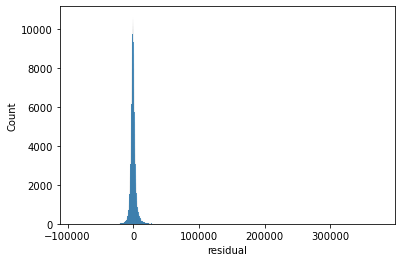

In [79]:
sns.histplot(data=df_reg['residual'])

In [80]:
df_reg['residual'].max()

375254.2806207235

In [58]:
df_reg[df_reg['residual']<-50000]

,Price,Year,Mileage,predicted,residual
9271,99999.0,2011,37203,25407.134589,-74591.865411
11239,159007.0,2014,17719,103465.872852,-55541.127148
11240,163990.0,2014,8828,104049.910038,-59940.089962
11241,165970.0,2016,5563,107255.130378,-58714.869622
11242,165000.0,2015,17047,105005.389138,-59994.610862
...,...,...,...,...,...
723968,299777.0,2015,17722,228034.918014,-71742.081986
732896,15780.0,2008,973746,-50246.931852,-66026.931852
745943,159985.0,2016,21,67202.135913,-92782.864087
771124,3899.0,2002,1000000,-59661.880488,-63560.880488


In [81]:
#add the other variables back on for analysis
df_reg = df_reg[['Price','Year','Mileage','predicted','residual']]

In [82]:
df_reg.head()

,Price,Year,Mileage,predicted,residual
0,8995.0,2014,35725,16180.941993,-7185.941993
1,8995.0,2013,48851,13823.340101,-4828.340101
2,10495.0,2013,57596,13248.893447,-2753.893447
3,16994.0,2015,22756,18528.230778,-1534.230778
4,17995.0,2015,31872,17929.413661,65.586339


In [83]:
df_merge2 = df_cars.merge(df_reg, on = ['Price','Year','Mileage'], indicator = True)

In [84]:
df_merge2.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model,predicted,residual,_merge
0,8995.0,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,Acura ILX6-Speed,16180.941993,-7185.941993,both
1,10888.0,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,Acura ILX5-Speed,16155.395900,-5267.395900,both
2,8995.0,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,Acura ILX6-Speed,13823.340101,-4828.340101,both
3,10999.0,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,Acura ILX5-Speed,16316.240218,-5317.240218,both
4,14799.0,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,Acura ILXAutomatic,21332.265154,-6533.265154,both


In [85]:
df_merge2['_merge'].value_counts()

both          854300
left_only          0
right_only         0
Name: _merge, dtype: int64

In [86]:
df_merge2 = df_merge2.drop(columns = ['_merge'])

In [87]:
#look at summary statistics for each Make 
df_merge2.groupby('Make').agg({'residual':['mean','median','max','min']})

residual                                           
                       mean        median            max           min
Make                                                                  
AM             2.019134e-05   1633.120986   26269.868724 -18002.834764
Acura          8.778615e+01   -178.852048   74591.865411 -12860.626208
Alfa          -2.464284e+02  -3384.938530   33121.136069 -19956.694156
Aston         -1.323196e-04 -15901.960934  130892.599005 -54744.286525
Audi           1.512631e+01   -432.211952   59430.015825 -27175.557634
BMW            6.534182e+00   -863.609731   33587.075711 -17818.190705
Bentley        1.325960e-04  -3968.349829  118451.789692 -45062.852816
Buick          2.846539e+01   -298.672315   75110.461041 -10173.263315
Cadillac      -1.728885e+01   -479.607042   98752.935238 -24362.156198
Chevrolet     -5.230490e+00   -438.589962  175610.782770 -35114.330110
Chrysler      -5.907224e-02   -237.698194   47712.476555  -9035.384527
Dodge         -1.760049e+00   -362.502273  169819.002742 -17836.148886
FIAT           9.458186e+00   -102.641561   15886.212086  -5952.310650
Ferrari        6.184841e-05  -3305.915477  226533.233549 -75060.782259
Fisker        -1.185936e-06   -835.619095   12635.866979  -8141.888571
Ford           1.966472e+01   -388.563962  105147.492967 -23148.631431
Freightliner  -3.982674e-07   -358.494117    9230.929650  -6851.053007
GMC            6.111158e-02   -589.837532   95463.001986 -22174.926423
Genesis       -2.664464e-05    -66.783449    7196.443683 -11029.531742
HUMMER        -8.230109e-06   -526.536487   44026.086467 -14281.338331
Honda         -1.332535e+00   -374.902298  118236.115354 -13871.671968
Hyundai       -9.726608e+00   -191.982322   32897.287809  -9376.676649
INFINITI       1.865563e+00   -329.199202  128207.865759 -14084.232636
Isuzu          6.577463e-05   -417.347259    8659.832994  -7241.413916
Jaguar        -1.723440e+00   -678.688933   86502.421597 -25319.348130
Jeep           1.042865e+00   -252.311184  205993.260773 -13046.968508
Kia           -1.541971e+00   -234.849713  153049.455784 -20640.641488
Lamborghini    1.363564e-04  -1486.355295   37455.353137 -31329.425816
Land          -3.302864e+01  -8503.290205  168421.802823 -24868.189471
Lexus          1.794446e+00   -594.484016   73104.422017 -18449.807593
Lincoln        7.535721e-01   -346.878895   39188.508471 -11608.271745
Lotus          6.412249e-06  -1027.316813   12327.268362 -10772.671159
MINI          -4.600594e-01   -209.824279   71682.498837  -9579.266279
Maserati      -2.070253e-05   -978.258314   60601.828609 -23858.091261
Mazda          6.127247e+00   -140.320086   30553.327877 -11405.675541
Mercedes-Benz -1.966017e+00   -420.077196  326850.728255 -84337.038043
Mercury        1.497160e+00   -245.990035   85129.413115  -9716.212843
Mitsubishi    -3.224582e+00   -297.939198   24144.874462 -19218.313678
Nissan        -2.400173e+01   -258.013087  101392.442746 -14843.112467
Oldsmobile     2.599056e-05   -507.672519   13918.632188  -6810.918621
Plymouth      -2.146522e-05  -1244.274832   12164.679915  -8323.193274
Pontiac       -2.084522e-01   -363.049760   52576.259318  -8245.786060
Porsche        4.945837e+00  -1772.521059  375254.280621 -45728.031466
Ram           -3.319664e-01     19.646750   50179.458441 -28112.636604
Rolls-Royce   -8.432874e-08  -3985.642682  168194.039290 -88211.018799
Saab           1.352257e-05   -270.193219    8039.828108  -7138.542601
Saturn        -9.916906e-01   -176.339856   12151.832582 -11022.607151
Scion         -2.707158e+00    -53.456810   15935.858878  -8439.769403
Subaru         2.422950e-01   -236.240342   66026.931852 -13334.434861
Suzuki         1.047683e-05   -467.458178   49959.441539  -9970.476973
Tesla          1.510873e-04  -6453.912339   92782.864087 -25626.388257
Toyota        -2.619480e+00   -176.919626   63560.880488 -17451.914611
Volkswagen    -3.107689e+00   -351.005433   61067.893690 -13579.081118
Volvo          9.573253e+00   -477.995308  

So obviously we're affected by outliers in residuals between the car's actual price and what our predicted car price. Certain models still didn't have a lot of observations, which could be why a lot of these predicted prices are so far off of the actual price. If we had a large amount of data for every model, then this regression probably would have performed much better. Standard practice would be to go back and look at the model, but I'll move forward treating them as outliers that didn't have enough information to predict and keep this limitation in mind.

In [88]:
df_merge2['residual'].describe()

count    854300.000000
mean          0.842126
std        4826.518245
min      -88211.018799
25%       -2141.872757
50%        -336.360855
75%        1635.752295
max      375254.280621
Name: residual, dtype: float64

An outlier is considered more than two standard deviations away from the mean. So we need to remove values greater than 9653.9 and less than -9652.2.

In [89]:
df_no_outliers = df_merge2[(df_merge2['residual']<=9653.9) & (df_merge2['residual']>=-9652.2)]

<AxesSubplot:xlabel='residual', ylabel='Count'>

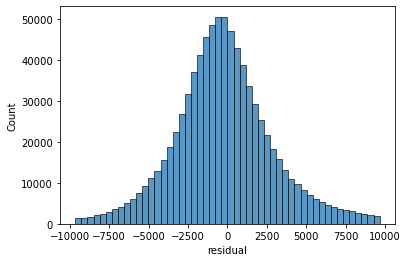

In [90]:
sns.histplot(data=df_no_outliers['residual'], bins = 50)

In [10]:
df_mean_res = df_no_outliers.groupby('Make').agg({'residual':['mean','max','min']}).apply(lambda s: s.apply(lambda x: format(x, 'g')))

In [18]:
df_mean_res.sort_values(('residual', 'mean'))

residual                   
                       mean      max       min
Make                                          
MINI               -105.819  9548.29  -9579.27
Lotus              -119.584  7983.37  -4154.17
Oldsmobile         -131.308  9054.64  -6810.92
Ferrari            -144.508  9591.27   -9088.4
INFINITI           -165.058  9647.02  -9594.27
Scion              -18.7928  9608.24  -8439.77
Ram                -18.9609   9639.3  -9647.64
Honda              -182.528  9642.55  -9242.95
Saturn             -2.22663  9631.81  -6936.92
Subaru             -206.109  9648.14  -9572.07
Volkswagen         -211.046  9644.74   -9615.4
Dodge              -234.126  9647.96  -9650.18
Jeep               -243.882  9633.28  -9634.44
Mercury            -249.444  9556.65  -9471.45
Mercedes-Benz      -280.494  9647.95  -9651.69
Tesla              -2945.14  9006.66   -9650.8
Freightliner   -3.98267e-07  9230.93  -6851.05
Lincoln            -315.821  9651.76  -9646.56
Ford               -317.388  9651.51  -9650.19
Pontiac            -320.108  9479.08  -8245.79
FIAT               -33.4747  8233.25  -5952.31
Audi               -337.966  9651.21  -9622.11
Bentley            -338.275  9591.24  -9564.88
Land               -3407.94  9635.29  -9650.94
Cadillac           -371.043  9647.46  -9652.06
Mazda              -39.9766  9641.87  -9301.99
Volvo              -390.113  9644.49   -9631.8
HUMMER             -432.479   9572.2  -9264.48
Chevrolet          -454.944  9652.42  -9650.29
Lexus               -457.08  9647.62  -9620.32
Kia                -50.6324  9616.58  -8732.52
Suzuki             -512.102  9347.05  -8591.89
smart               -53.296  8110.33  -5903.01
GMC                -560.648  9653.84  -9650.51
Jaguar             -635.002  9590.92  -9651.15
BMW                -737.003  9653.44  -9643.16
Plymouth           -739.509  7142.54  -8323.19
Fisker             -743.286  6132.52  -8141.89
Chrysler           -83.3264  9632.52  -9035.38
Hyundai             -83.853   9646.1  -9376.68
Maserati           -839.134  9439.03  -9504.63
Porsche            -909.867  9618.61  -9652.02
Nissan             -94.5307  9636.01  -9436.67
Buick              -96.5667  9452.28  -9019.61
Mitsubishi         -97.1515  9648.64  -9539.95
Toyota             -99.2935  9653.78  -9646.35
Saab            1.35226e-05  8039.83  -7138.54
AM                   1324.5  8455.06  -4718.07
Rolls-Royce         198.931  9641.54  -9035.25
Alfa                2790.72   9447.5  -8788.24
Acura               29.2983  9629.05  -9583.27
Isuzu           6.57746e-05  8659.83  -7241.41
Aston               703.097  9418.44  -8865.19
Genesis             84.1949  7196.44  -8096.69
Lamborghini          881.29  8800.71  -7348.57

Overpriced cars: Alfa, AM, Lamborghini, Aston

Underpriced cars: Land Rover, Tesla, Porsche, Maserati

In [92]:
df_no_outliers.to_csv(os.path.join(path,'02 Data','Prepared Data','cars_residual.csv'))

### Model Performance

In [94]:
rmse_poly = mean_squared_error(y, y_predicted)
r2_poly = r2_score(y, y_predicted)

In [95]:
print('Coefficients:' ,regression.coef_)
print('Mean squared error: ', rmse_poly)
print('R2 score: ', r2_poly)

Coefficients: [[ 1.49537356e+03 -6.56885825e-02 -5.35144067e+04 ... -7.50492408e+04
  -7.60886931e+04 -7.72812885e+04]]
Mean squared error:  23307588.36559794
R2 score:  0.8627407461192012


The mean squared error is still really high, but it reduced from around 180 million to 23 million. Our R^2 is strong, which means our model fits the data points well. 
